In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from numpy import *
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
import networkx as nx

In [5]:
#1将鸢尾花数据集画成图
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names) #读取csv数据
data = np.array(dataset)
data = data[:,3]
#print(data)

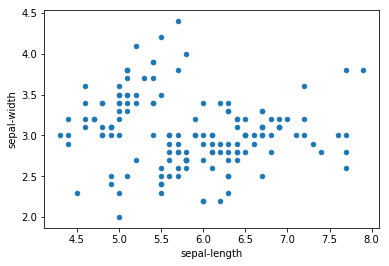

In [8]:
#绘制散点图
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter')
# 计算邻接矩阵
def aj_mat(data):
    n = data.shape[0]
    dist_mat = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            dist_mat[i,j] = np.dot(data[i]-data[j],data[i]-data[j])
            if(i!=j):
                dist_mat[j,i] = dist_mat[i,j]         
    aj_mat = np.exp(-0.5*dist_mat)
    return aj_mat
# 根据邻接矩阵计算每个样本的k近邻
def k_neighbors(A,k=9):
    n = []
    for i in range(len(A)):
        inds = np.argsort(A[i])
        inds = inds[-k:-1]
        n.append(inds)
    return np.array(n)
#计算邻接矩阵和近邻
AJ = aj_mat(data)
kn = k_neighbors(AJ)

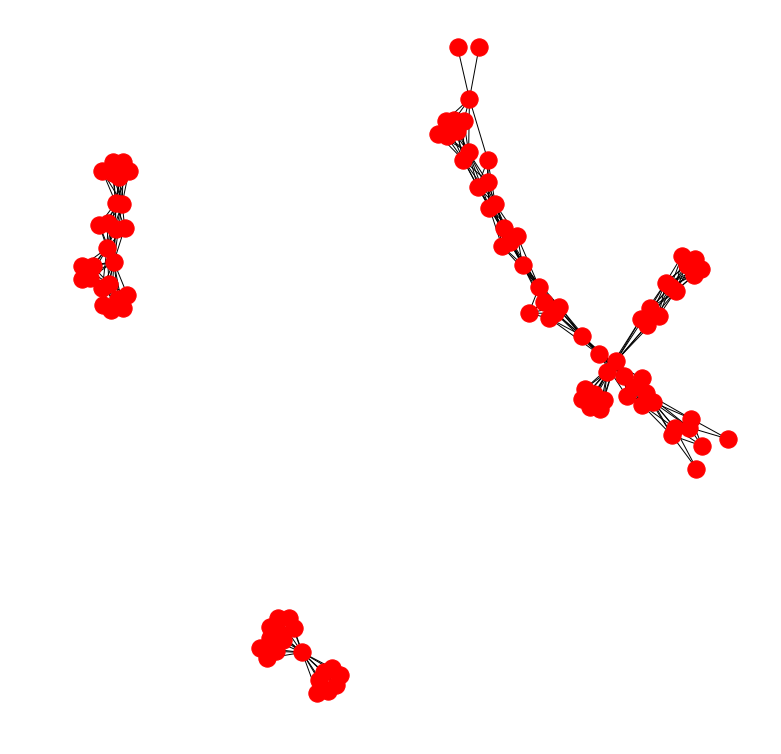

In [9]:
#根据邻接矩阵将鸢尾花数据集绘制成图
plt.figure(figsize=(10,10))
G = nx.Graph()
for i in range(len(AJ)):
    for j in range(len(AJ)):
        if i in kn[j] and j in kn[j]:
            G.add_edge(i,j)
nx.draw(G)
plt.show()

In [14]:
#34
#相似性函数
def similarity_function(points):
    res = rbf_kernel(points)
    for i in range(len(res)):
        res[i, i] = 0
    return res
#谱聚类
def spectral_clustering(points, k):
    #:param points: 样本点
    #:param k: 聚类个数
    #:return: 聚类结果
    W = similarity_function(points)
    # 度矩阵D可以从相似度矩阵W得到，这里计算的是D^(-1/2)
    # D = np.diag(np.sum(W, axis=1))
    # Dn = np.sqrt(LA.inv(D))
    Dn = np.diag(np.power(np.sum(W, axis=1), -0.5))
    # 拉普拉斯矩阵：L=Dn*(D-W)*Dn=I-Dn*W*Dn
    L = np.eye(len(points)) - np.dot(np.dot(Dn, W), Dn)
    eigvals, eigvecs = LA.eig(L)
    # 前k小的特征值对应的索引，argsort函数
    indices = np.argsort(eigvals)[:k]
    # 取出前k小的特征值对应的特征向量，并进行正则化
    k_smallest_eigenvectors = normalize(eigvecs[:, indices])
    # 利用KMeans进行聚类
    return KMeans(n_clusters=k).fit_predict(k_smallest_eigenvectors) 

def __init__(clas,data, n_cluster, gamma=1/np.sqrt(2)):
    clas.n_cluster = n_cluster
    clas.gamma = gamma
    clas.W = None #相似度矩阵
    clas.L = None #拉普拉斯矩阵
    clas.D = None #度数矩阵
    clas.data = data
#预处理     
def normalization(self): 
    scaler = MinMaxScaler( )
    scaler.fit(self.data)
    scaler.data_max_
    my_matrix_normorlize=scaler.transform(self.data)
    lreturn my_matrix_normorlize
#画谱聚类后的数据集 
def Draw(clas,data, y):
    x = data
    x1, x2 = x[:,0], x[:,1]
    G = nx.house_graph()
    # explicitly set positions
    pos = {}
    for i in range(0, 150):
        pos[i] = (x1[i],x2[i])
    nodelists1,  nodelists2,  nodelists3 = [],[],[] #三类样本三个节点列表
    for i in range(0, 150):
        if y[i]==0:
            nodelists1.append(i)
        elif y[i]==1:
            nodelists2.append(i)
        else:
            nodelists3.append(i)
    edglist1, edglist2, edglist3, edglist4 = [], [], [], []  #四种边列表
    dist = np.zeros([150,150])
    for i in range(0,150):
        for j in range(i,150):
            if i!=j:
                dist[i][j] = dist[j][i] = self.ou_dis(x[i],x[j])               
                if y[i]==y[j]:
                    if dist[i][j]>0.76: #同一类样本相似度大于0.76则两节点间有一条线
                        edglist1.append((i, j))
                    elif dist[i][j]>0.7:
                        edglist2.append((i, j))
                else:
                    if dist[i][j]>0.76:
                        edglist3.append((i, j))
                    elif dist[i][j]>0.7:
                        edglist4.append((i, j))
                        
    #设置节点，样式    
    nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists1, node_color="w", edgecolors="black", node_shape='o',label= 'Setosa')
    nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists2, node_color="w", edgecolors="black", node_shape='^', label='Versicolour')
    nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists3, node_color="w", edgecolors="black",node_shape='s',label='Virginica')
    #设置边，样式
    nx.draw_networkx_edges(G,pos,edgelist=edglist1 )
    nx.draw_networkx_edges(G,pos,edgelist=edglist2, alpha=0.1)
    nx.draw_networkx_edges(G,pos,edgelist=edglist3, alpha=0.5, style='dashed')
    nx.draw_networkx_edges(G,pos,edgelist=edglist4, alpha=0.1, style='dashed')
    plt.legend(loc=2) 
    plt.axis('on')
    plt.show()

In [15]:

X, y = make_blobs()
labels = spectral_clustering(X, 9)
Draw(clas,data, labels)

NameError: name 'clas' is not defined